# A. La régression lineaire

## I. Introduction
### II. Régression lineaire simple
Soit un ensemble de points $ \{ (x_{i},y_{i}) \in R^{2}  i=1...m \}$.
Trouver une fonction $h$ telle que $$h(x_{i}) \approx y_{i} \forall i \in \{1 ... m\}$$

#### Q1. Ecrire un script qui permet d'obtenir le nuage de point suivant:
Remarque: On remaque qu'il y a une correlation entre x et y dans cette figure.

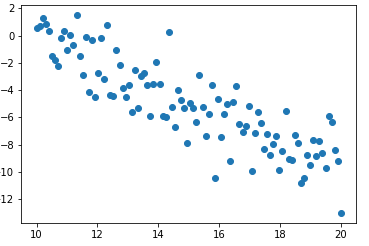

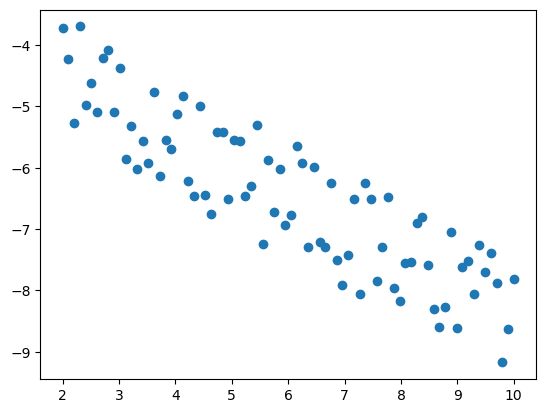

In [27]:
# Votre code ici
# 1ere methode
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X=np.linspace(2,10,80)
              
h=-1/2*X-3.5

Y=h+np.random.uniform(1,-1,size=80)

plt.scatter(X,Y)

#f(x)=a*x+b

#### Q2. la fonction hypothèse h(x)
Soit $h(x)=w_{0}+ w_{1}x$. Sur la meme figure, tracez h(x) pour differentes valeurs des coeficients  $w_{0}$ et $w_{1}$ et calculez la valeur de la fonction objective (coût) suivante:
$$ J(w_{0},w_{1})=\frac{1}{2m}\sum_{i=0}^{m}(h(x_{i})-y_{i})^{2} $$
Il faut remarquer que $$\sum_{i=0}^{m}(h(x_{i})-y_{i})^{2} = (\hat{Y}-Y).(\hat{Y}-Y)$$
avec
$\hat{Y}=(h(x_{1}),h(x_{2}),... h(x_{m}))$
et $Y=(y_{1},y_{2},...y_{m})$

Que remarquez-vous?


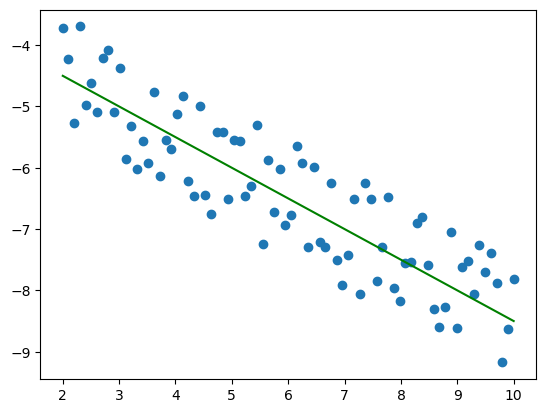

In [36]:
#Votre code ici



#trace le h
plt.scatter(X,Y)
plt.plot(X,h,c='g')
plt.show()

#trouve function
E=Y-h
j=E.dot(E)/X.shape[0]









#### Q3. Méthode de la descente du gradient 
Pour minimiser le coût $$ J(w_{0},w_{1})=\frac{1}{2m}\sum_{i=0}^{m}(h(x_{i})-y_{i})^{2} = \frac{1}{2m}\sum_{i=0}^{m}(w_{0}+ w_{1}x_{i}-y_{i})^{2} $$
On utilise la methode de la descente du gradient. Il faut donc calculer la dérivée de $J(w_{0},w_{1})$ par rapport à $w_{0}$ et par rapport à $w_{1}$ nous avons alors:
$$ \frac{\delta J(w_{0},w_{1})}{\delta w_{0}}=\frac{1}{m}\sum_{i=0}^{m}(w_{0}+ w_{1}x_{i}-y_{i}) $$

$$ \frac{\delta J(w_{0},w_{1})}{\delta w_{1}}=\frac{1}{m}\sum_{i=0}^{m}(w_{0}+ w_{1}x_{i}-y_{i})x_{i} $$
A chaque itération, la mise à jour des coeficients sera comme suivant:
$$ w_{0}\leftarrow w_{0}- \alpha\frac{\delta J(w_{0},w_{1})}{\delta w_{0}}$$
$$ w_{1}\leftarrow w_{1}- \alpha\frac{\delta J(w_{0},w_{1})}{\delta w_{1}}$$

$\alpha$: learning rate

a. Ecrire un script pour cet algorithme.

b. Tracer l'evolution de ${J(w_{0},w_{1})}$ au cours des itération de la descente du gradient pour differentes valeur de $\alpha$.

c. Que remarquez-vous

d. Visulisez la solution obtenue

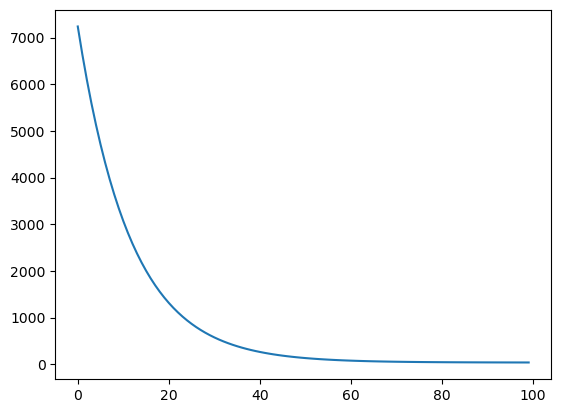

In [56]:
# votre code ici
jh=[]
a=10
b=15
alpha=0.001
for i in range(100):
    Yh=a*X+b
    E=Y-Yh
    J=E.dot(E)/X.shape[0]

    dja=-X.dot(E)/X.shape[0]
    djb=-np.sum(E)/X.shape[0]
    a=a-alpha*dja
    b=b-alpha*djb
    jh.append(J)

    
plt.plot(jh)
plt.show()





#### Q4. Méthode des moindres carées
Dans le cas d'une régression lineaire simple nous avons la solution directe suivante:
$$ w_{1}=\frac{\sum_{i=0}^{m}(x_{i}-\overline{x})(y_{i}-\overline{y})}{\sum_{i=0}^{m}(x_{i}-\overline{x})^2} $$

$$w_{0}=\overline{y}-w_{1}\overline{x}$$

Où $\overline{x}$ est la moyenne des éléments de x

a. Ecrire un script qui calcule les valeur de $w_{0}$ et $w_{1}$

b. Visualiser les resultats

-3.611608477987274
-0.47481819404915404


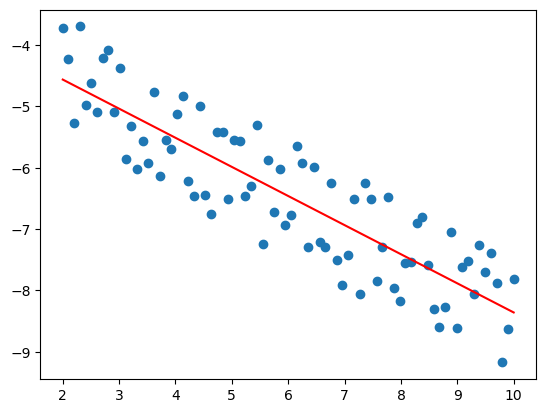

In [75]:
#Votre code ici
Xb=np.mean(X)
Yb=np.mean(Y)

x=X-Xb
y=Y-Yb
w1=x.dot(y)/x.dot(x)

w0=Yb-w1*Xb
print(w0)
print(w1)
plt.scatter(X,Y)

plt.plot(X,w0+w1*X,c='r')


plt.show()





Une autre solution sous la forme matricielle:
$$w = (X^{T}X)^{-1}X^{T}Y $$
avec

$w=[w_{1},w_{2}]$

$X=[[1,x_{1}],[1,x_{2}],...,[1,x_{m}]]$

$Y=[y_{1}, y_{2},...,y_{m}]$

Ecrire un script pour cette solution, et coparer le resultat avec les méthodes precedentes.

In [105]:
#Votre code ici
import numpy.linalg as npl
X0=np.hstack((np.ones((80,1)),X.reshape(-1,1)))

w=npl.inv(X0.transpose().dot(X0)).dot(X0.T).dot(Y)
print(w)
#w=npl.inv(X.transpose().dot(X))







[-3.61160848 -0.47481819]


# III-Régression lineaire multiple
Dans ce cas $x=(x_{1},...,x_{n})\in \Re^{n}$ et $y \in \Re$ la fonction hypothèse $h(x)=w_{0}+w_{1}x_{1}+...+w_{n}x_{n}$

### Refaire les mêmes étapes pour n=2